In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam

In [2]:
(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()

In [3]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
print(x_train.shape, x_test.shape)
print(t_train.shape, t_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [4]:
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

In [5]:
cnn = Sequential()
cnn.add(Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3),
               filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3, 3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

In [6]:
cnn.compile(loss='sparse_categorical_crossentropy', 
            optimizer=Adam(), metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [7]:
hist = cnn.fit(x_train, t_train, batch_size=128,
               epochs=30, validation_data=(x_test, t_test))

Epoch 1/30
469/469 [==============================] - 53s 112ms/step - loss: 0.5097 - accuracy: 0.8203 - val_loss: 0.3251 - val_accuracy: 0.8840
Epoch 2/30
469/469 [==============================] - 52s 110ms/step - loss: 0.3328 - accuracy: 0.8807 - val_loss: 0.2857 - val_accuracy: 0.8932
Epoch 3/30
469/469 [==============================] - 51s 108ms/step - loss: 0.2838 - accuracy: 0.8972 - val_loss: 0.2563 - val_accuracy: 0.9047
Epoch 4/30
469/469 [==============================] - 51s 108ms/step - loss: 0.2513 - accuracy: 0.9079 - val_loss: 0.2441 - val_accuracy: 0.9070
Epoch 5/30
469/469 [==============================] - 51s 108ms/step - loss: 0.2350 - accuracy: 0.9141 - val_loss: 0.2290 - val_accuracy: 0.9158
Epoch 6/30
469/469 [==============================] - 51s 108ms/step - loss: 0.2157 - accuracy: 0.9208 - val_loss: 0.2178 - val_accuracy: 0.9212
Epoch 7/30
469/469 [==============================] - 51s 108ms/step - loss: 0.2003 - accuracy: 0.9255 - val_loss: 0.2140 - val_ac

In [8]:
cnn.evaluate(x_test, t_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2980 - accuracy: 0.9275


[0.29804959893226624, 0.9275000095367432]

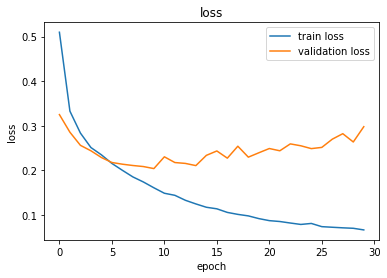

In [9]:
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')
plt.show()

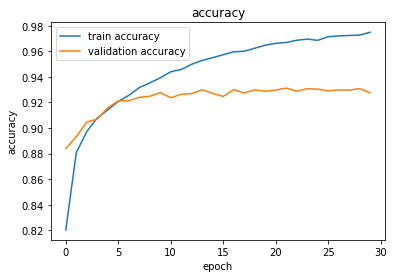

In [10]:
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')
plt.show()